<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#!pip install -U scikit-learn

In [ ]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [80]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [81]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
import pandas as pd
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


We use the method <code>head</code> to display the first 5 rows of the dataframe.


In [ ]:
df.head(5)

### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [ ]:
df.dtypes

We use the method describe to obtain a statistical summary of the dataframe.


In [ ]:
df.describe()

# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [ ]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df.describe()

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [77]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df.replace({
    'bedrooms': {np.nan: df['bedrooms'].mean()},
    'bathrooms': {np.nan: df['bathrooms'].mean()}
}, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [78]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())


In [79]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [38]:
import pandas as pd

# Load your dataset (make sure the filename matches your workspace file)
df = pd.read_csv("housing.csv")

# Count the number of houses with unique floor values
floor_counts = df["floors"].value_counts().to_frame()

# Display the result
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


<Figure size 800x600 with 0 Axes>

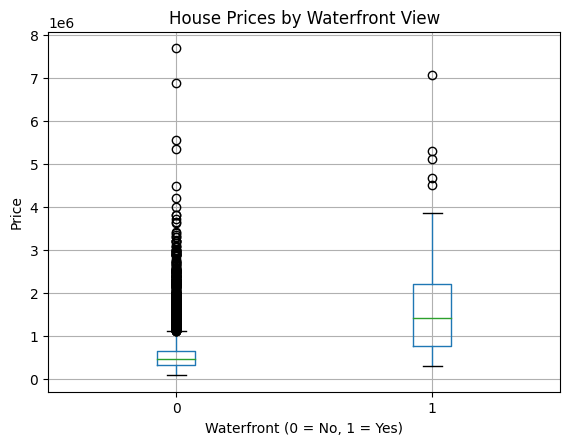

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(column="price", by="waterfront")

plt.title("House Prices by Waterfront View")
plt.suptitle("")  # removes the automatic title
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


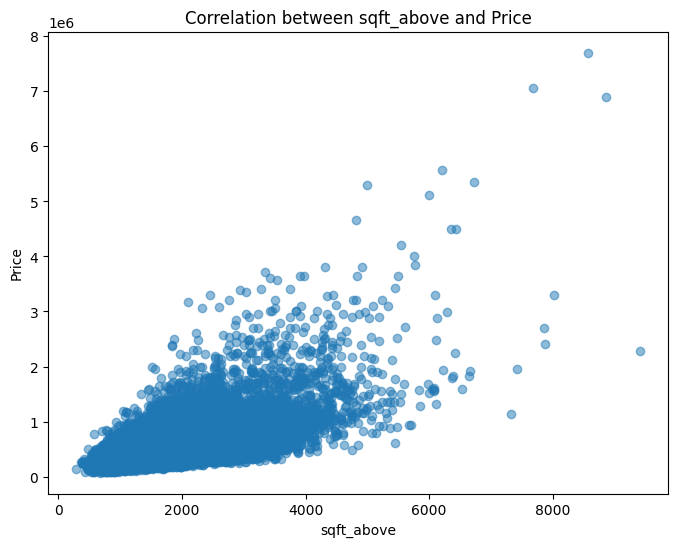

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["sqft_above"], df["price"], alpha=0.5)

plt.title("Correlation between sqft_above and Price")
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.show()


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [45]:
import pandas as pd

# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Look at correlations with price
price_corr = corr_matrix['price'].sort_values(ascending=False)

print(price_corr)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525885
view             0.397293
sqft_basement    0.323816
bedrooms         0.308890
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Unnamed: 0       0.027372
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# Define X and y
X = df[['long']]   # longitude feature
y = df['price']    # target variable

# Create and fit the model
lm = LinearRegression()
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R^2 value:", r2)


R^2 value: 0.00046769430149007363


### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define predictor (sqft_living) and target (price)
X = df[['sqft_living']]   # keep as DataFrame
y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R^2 value:", r2)


R^2 value: 0.4928532179037931


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [64]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [65]:
# Drop rows with NaN values in the selected features or target
X = df[features].dropna()
y = df.loc[X.index, "price"]

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

r2 = lm.score(X, y)
print("R^2:", r2)


R^2: 0.6578373924727967


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the list of features (adjust if your assignment specifies differently)
features = ["sqft_living", "bedrooms", "bathrooms", "floors", 
            "waterfront", "view", "grade", "sqft_above", 
            "sqft_basement", "lat", "long"]

X = df[features]
y = df["price"]

# Create a pipeline with imputation, scaling, and linear regression
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # handle missing values
    ("scaler", StandardScaler()),                  # standardize features
    ("linear_model", LinearRegression())           # regression step
])

# Fit the pipeline
pipeline.fit(X, y)

# Calculate R^2
r2 = pipeline.score(X, y)
print("R^2:", r2)


R^2: 0.6658863993510893


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [57]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [58]:
from sklearn.linear_model import Ridge

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the list of features
features = ["sqft_living", "bedrooms", "bathrooms", "floors", 
            "waterfront", "view", "grade", "sqft_above", 
            "sqft_basement", "lat", "long"]

X = df[features]
y = df["price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: impute missing values, scale features, then Ridge regression
ridge_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # fill NaNs with column mean
    ("scaler", StandardScaler()),                  # standardize features
    ("ridge", Ridge(alpha=0.1))                    # Ridge regression with alpha=0.1
])

# Fit the pipeline
ridge_pipeline.fit(X_train, y_train)

# Calculate R^2 on test data
r2_test = ridge_pipeline.score(X_test, y_test)
print("R^2 on test data:", r2_test)

R^2 on test data: 0.6709239496014623


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the list of features (adjust if your assignment specifies differently)
features = ["sqft_living", "bedrooms", "bathrooms", "floors", 
            "waterfront", "view", "grade", "sqft_above", 
            "sqft_basement", "lat", "long"]

X = df[features]
y = df["price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: impute missing values, polynomial transform, scale, then Ridge regression
ridge_poly_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),        # handle NaNs
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), # 2nd order polynomial transform
    ("scaler", StandardScaler()),                       # standardize features
    ("ridge", Ridge(alpha=0.1))                         # Ridge regression with alpha=0.1
])

# Fit the pipeline
ridge_poly_pipeline.fit(X_train, y_train)

# Calculate R^2 on test data
r2_test = ridge_poly_pipeline.score(X_test, y_test)
print("R^2 on test data:", r2_test)

R^2 on test data: 0.7134523545682817


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
